# Outliers en 1 Dimension

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

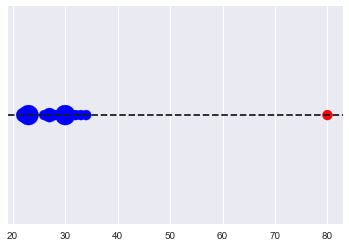

In [89]:
edades = np.array([22,22,23,23,23,23,26,27,27,28,30,30,30,30,31,32,33,34,80])
edad_unique, counts = np.unique(edades, return_counts=True)
sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

# Outliers en 2 Dimensiones

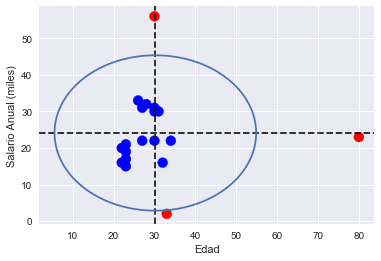

In [90]:
salario_anual_miles = np.array([16,20,15,21,19,17,33,22,31,32,56,30,22,31,30,16,2,22,23])
media = (salario_anual_miles).mean()
std_x = (salario_anual_miles).std()*2
media_y = (edades).mean()
std_y = (edades).std()*2

colors = ['blue']*len(salario_anual_miles)
for index, x in enumerate(salario_anual_miles):
    if abs(x-media) > std_x:
        colors[index] = 'red'
        
for index, x in enumerate(edades):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'

plt.scatter(edades, salario_anual_miles, s=100, color=colors)
plt.axhline(media, color='k', linestyle='--')
plt.axvline(media_y, color='k', linestyle='--')

v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis

t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )

plt.xlabel('Edad')
plt.ylabel('Salario Anual (miles)')
plt.show()

# Outliers en 3D

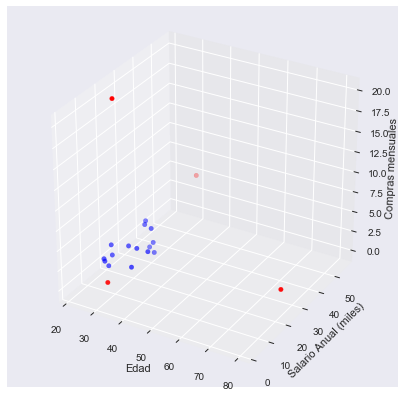

In [91]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

compras_mes = np.array([1,2,1,20,1,0,3,2,3,0,5,3,2,1,0,1,2,2,2])
media_z = (compras_mes).mean()
std_z = (compras_mes).std()*2

for index, x in enumerate(compras_mes):
    if abs(x-media_z) > std_z:
        colors[index] = 'red'

ax.scatter(edades, salario_anual_miles, compras_mes, s=20, c=colors)
plt.xlabel('Edad')
plt.ylabel('Salario Anual (miles)')
ax.set_zlabel('Compras mensuales')

plt.show()

# Outliers usando Boxplots

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2529d908>,
 'caps': [<matplotlib.lines.Line2D at 0x1a25286278>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2529d780>],
 'medians': [<matplotlib.lines.Line2D at 0x1a25286b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a25286f98>],
 'means': []}

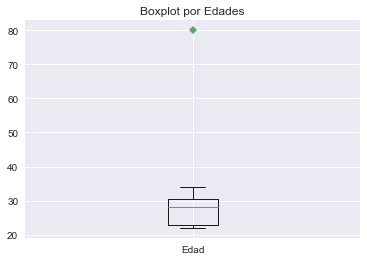

In [92]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot por Edades')
ax.boxplot(edades, flierprops=green_diamond, labels=["Edad"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a252eac50>,
 'caps': [<matplotlib.lines.Line2D at 0x1a252f06d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a252ea748>],
 'medians': [<matplotlib.lines.Line2D at 0x1a252f0f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a252f4438>],
 'means': []}

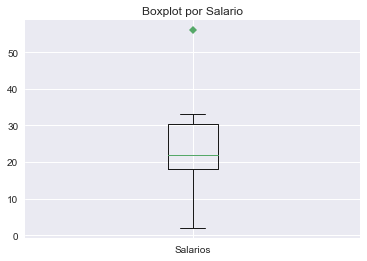

In [93]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot por Salario')
ax.boxplot(salario_anual_miles, flierprops=green_diamond, labels=["Salarios"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a259e4668>,
 'caps': [<matplotlib.lines.Line2D at 0x1a259e4f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a259e44e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a25bbd898>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a25bbdcf8>],
 'means': []}

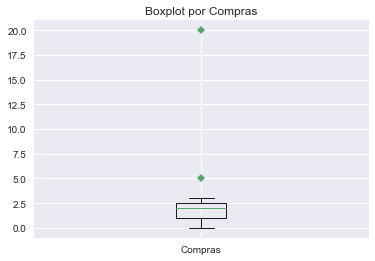

In [94]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot por Compras')
ax.boxplot(compras_mes, flierprops=green_diamond, labels=["Compras"])

# Como afecta ouliers

/anaconda/envs/python36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


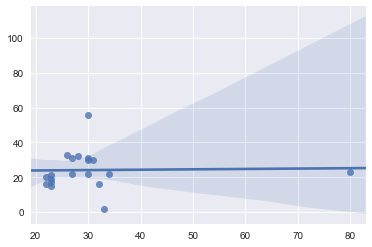

In [95]:
import seaborn as sns

#CON OUTLIERS

sns.set(color_codes=True)
sns.regplot(x=edades, y=salario_anual_miles)

/anaconda/envs/python36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


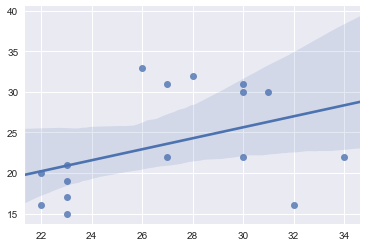

In [96]:
# SIN OUTLIERS

edades_fix=[]
salario_anual_miles_fix=[]

for index, x in enumerate(salario_anual_miles):
    y= edades[index]
    if abs(x-media) > std_x or abs(y-media_y) > std_y:
        pass
    else:
        edades_fix.append(y)
        salario_anual_miles_fix.append(x)
        
sns.regplot(x=np.array(edades_fix), y=np.array(salario_anual_miles_fix))

# Outliers usando Libreria Pyod

In [97]:
#!pip install pyod

In [98]:
from pyod.models.knn import KNN
from pyod.models.pca import PCA
import pandas as pd

In [99]:
df = pd.DataFrame(data={'edad':edades,'salario':salario_anual_miles, 'compras':compras_mes})

In [100]:
clf = KNN(contamination=0.18)
#clf = PCA(contamination=0.17)
clf.fit(df)

X=df
clf.fit(X)
scores_pred = clf.decision_function(X)
y_pred = clf.predict(X)

In [101]:
scores_pred

array([ 4.12310563,  5.19615242,  5.19615242, 19.33907961,  4.        ,
        3.74165739,  5.        ,  6.70820393,  3.60555128,  3.74165739,
       25.3179778 ,  4.12310563,  7.68114575,  3.60555128,  5.09901951,
        9.05538514, 18.13835715,  8.77496439, 50.009999  ])

In [102]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [103]:
df[y_pred == 1]

,compras,edad,salario
3,20,23,21
10,5,30,56
16,2,33,2
18,2,80,23


El artículo completo y más en www.aprendemachinelearning.com